# ECE1180 - Final Project - Billiard Collision Physics - Shelby Wilson

In this project I simulate the physics of Billiard balls in a simplified scenario. Further description and analysis of the below scenarios can be found in the Final Project Report document.

## Imports

In [1]:
from vpython import *
from matplotlib import pyplot as plt
import math

<IPython.core.display.Javascript object>

## Two Balls Colliding in 1-Dimension

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

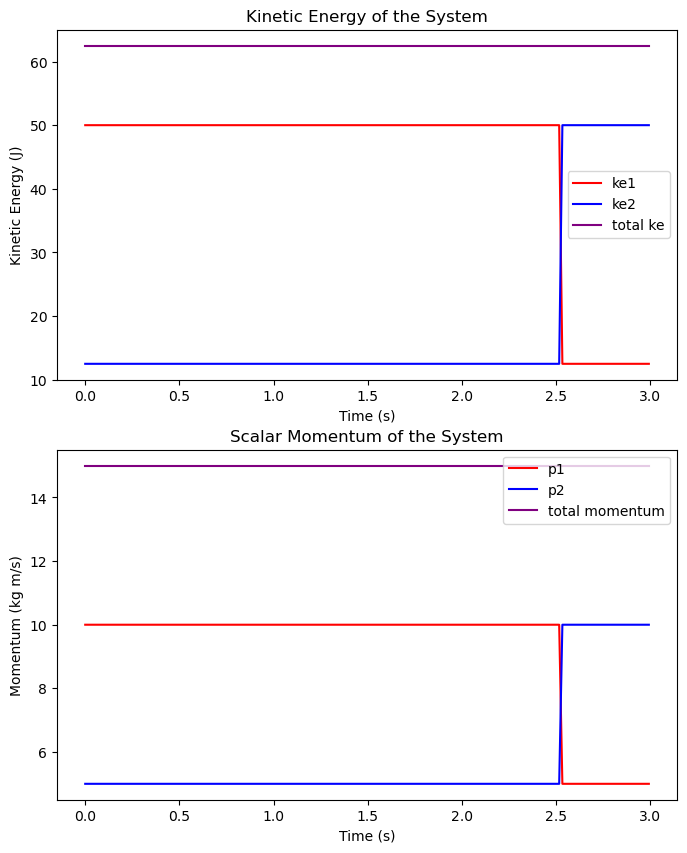

In [2]:
# Setup the scene and VPython Objects
scene = canvas()
scene.camera.pos = vector(0,10,20)
floor = box(pos=vector(0,0,0), size=vector(50,1,30), color=color.white)
ball1 = sphere(pos=vector(-20,1,5), radius=1, color=color.red, velocity=vector(0,0,0), mass=1, ke=0, mom=vector(0,0,0))
ball2 = sphere(pos=vector(20,1,5), radius=1, color=color.blue, velocity=vector(0,0,0), mass=1, ke=0, mom=vector(0,0,0))

# Setup real-time timestep
t = 0
dt = 0.017

# Initialize the balls with velocities directed at each other
ball1.velocity = vector(10,0,0)
ball2.velocity = vector(-5,0,0)

ke1_list = []
ke2_list = []
total_ke_list = []
t_list = []
momb1_list = []
momb2_list = []
mom_list = []

while t < 3:
    rate(60) # Real-time
    ball1.pos += ball1.velocity*dt
    ball2.pos += ball2.velocity*dt
    
    # Check for collisions
    if (mag(ball1.pos-ball2.pos) <= ball1.radius+ball2.radius):
        tempv1 = ball1.velocity
        ball1.velocity = (((ball1.velocity)*(ball1.mass-ball2.mass))+(ball2.velocity*2*ball2.mass))/(ball1.mass+ball2.mass)
        ball2.velocity = (((ball2.velocity)*(ball2.mass-ball1.mass))+(tempv1*2*ball1.mass))/(ball1.mass+ball2.mass)
        
    # Calculate Kinetic Energy of the system
    ball1.ke = (mag(ball1.velocity)**2)*0.5*ball1.mass
    ball2.ke = (mag(ball2.velocity)**2)*0.5*ball2.mass
    total_ke = ball1.ke + ball2.ke
    
    # Calculate momentum of the system
    ball1.mom = ball1.velocity*ball1.mass
    ball2.mom = ball2.velocity*ball2.mass
    total_mom = mag(ball1.mom) + mag(ball2.mom)
    
    momb1_list.append(mag(ball1.mom))
    momb2_list.append(mag(ball2.mom))
    mom_list.append(total_mom)
    ke1_list.append(ball1.ke)
    ke2_list.append(ball2.ke)
    total_ke_list.append(total_ke)
    t_list.append(t)
    
    t += dt

# Plot results for kinetic energy and momentum
fig, axs = plt.subplots(2,figsize=(8, 10))
axs[0].plot(t_list,ke1_list,color="red",label="ke1")
axs[0].plot(t_list,ke2_list,color="blue",label="ke2")
axs[0].plot(t_list,total_ke_list,color="purple",label="total ke")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Kinetic Energy (J)")
axs[0].set_title("Kinetic Energy of the System")
axs[0].legend()
axs[1].plot(t_list,momb1_list,color="red",label="p1")
axs[1].plot(t_list,momb2_list,color="blue",label="p2")
axs[1].plot(t_list,mom_list,color="purple",label="total momentum")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Momentum (kg m/s)")
axs[1].set_title("Scalar Momentum of the System")
axs[1].legend()

## Two Balls Colliding in 2-Dimensions

<IPython.core.display.Javascript object>

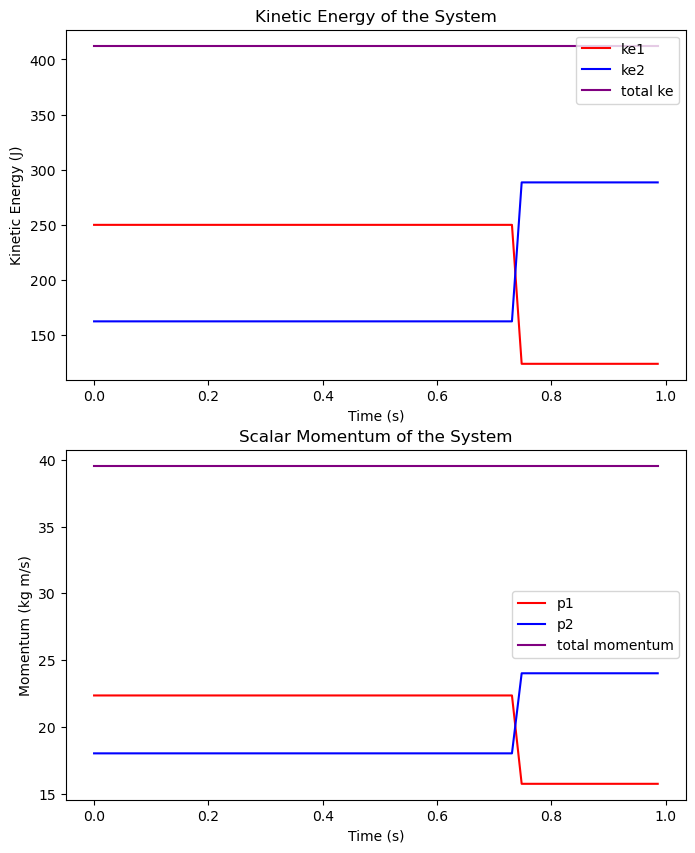

In [4]:
# Setup the scene and VPython Objects
scene = canvas()
scene.camera.pos = vector(0,20,20)
scene.forward = vector(0,-1,-1)
floor = box(pos=vector(0,0,0), size=vector(50,1,30), color=color.white)
ball1 = sphere(pos=vector(-20,1,0), radius=1, color=color.red, velocity=vector(0,0,0), mass=1, ke=0)
ball2 = sphere(pos=vector(10,1,10), radius=1, color=color.blue, velocity=vector(0,0,0), mass=1, ke=0)

# Setup real-time timestep
t = 0
dt = 0.017

# Initialize the balls with velocities directed at each other
ball1.velocity = vector(22,0,4)
ball2.velocity = vector(-15,0,-10)

ke1_list = []
ke2_list = []
total_ke_list = []
t_list = []
momb1_list = []
momb2_list = []
mom_list = []

while t < 1:
    rate(60)
    ball1.pos += ball1.velocity*dt
    ball2.pos += ball2.velocity*dt
    
    # Check for collisions
    if mag(ball1.pos-ball2.pos) <= ball1.radius+ball2.radius:
        n_vect = ball2.pos-ball1.pos
        un_vect = norm(n_vect)
        ut_vect = vector(-un_vect.z,0,un_vect.x)
        ball1.v_norm = un_vect.dot(ball1.velocity)
        ball1.v_tan = ut_vect.dot(ball1.velocity)
        ball2.v_norm = un_vect.dot(ball2.velocity)
        ball2.v_tan = ut_vect.dot(ball2.velocity)

        temp_vnorm1 = ball1.v_norm
        
        ball1.v_norm = (((ball1.v_norm)*(ball1.mass-ball2.mass))+(2*ball2.mass*ball2.v_norm))/(ball1.mass+ball2.mass)
        ball2.v_norm = (((ball2.v_norm)*(ball2.mass-ball1.mass))+(2*ball1.mass*temp_vnorm1))/(ball1.mass+ball2.mass)
        ball1.v_norm = un_vect*ball1.v_norm
        ball2.v_norm = un_vect*ball2.v_norm
        ball1.v_tan = ut_vect*ball1.v_tan
        ball2.v_tan = ut_vect*ball2.v_tan
                       
        ball1.velocity = ball1.v_norm+ball1.v_tan
        ball2.velocity = ball2.v_norm+ball2.v_tan
    
    # Calculate Kinetic Energy of the system
    ball1.ke = (mag(ball1.velocity)**2)*0.5*ball1.mass
    ball2.ke = (mag(ball2.velocity)**2)*0.5*ball2.mass
    total_ke = ball1.ke + ball2.ke
    
    # Calculate momentum of the system
    ball1.mom = vec(abs(ball1.velocity.x),0,abs(ball1.velocity.z))*ball1.mass
    ball2.mom = vec(abs(ball2.velocity.x),0,abs(ball2.velocity.z))*ball2.mass
    total_mom = mag(ball1.mom + ball2.mom)
    
    momb1_list.append(mag(ball1.mom))
    momb2_list.append(mag(ball2.mom))
    mom_list.append(total_mom)
    ke1_list.append(ball1.ke)
    ke2_list.append(ball2.ke)
    total_ke_list.append(total_ke)
    t_list.append(t)
    
    t += dt
    

# Plot results for kinetic energy and momentum    
fig, axs = plt.subplots(2,figsize=(8, 10))
axs[0].plot(t_list,ke1_list,color="red",label="ke1")
axs[0].plot(t_list,ke2_list,color="blue",label="ke2")
axs[0].plot(t_list,total_ke_list,color="purple",label="total ke")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Kinetic Energy (J)")
axs[0].set_title("Kinetic Energy of the System")
axs[0].legend()
axs[1].plot(t_list,momb1_list,color="red",label="p1")
axs[1].plot(t_list,momb2_list,color="blue",label="p2")
axs[1].plot(t_list,mom_list,color="purple",label="total momentum")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Momentum (kg m/s)")
axs[1].set_title("Scalar Momentum of the System")
axs[1].legend()

## Two Balls Colliding in 2-Dimensions inside a Container

<IPython.core.display.Javascript object>

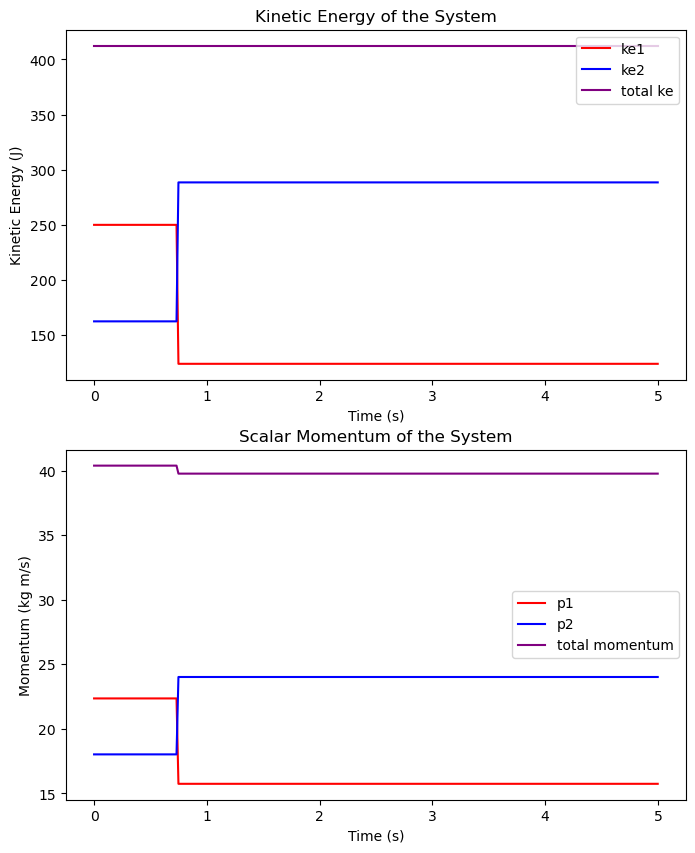

In [5]:
# Setup the scene and VPython Objects
scene = canvas()
scene.camera.pos = vector(0,20,20)
scene.forward = vector(0,-1,-1)
floor = box(pos=vector(0,0,0), size=vector(50,1,30), color=color.white)
back_wall = box(pos=vector(0,0,-15), size=vector(50,10,1), color=color.white)
left_wall = box(pos=vector(-25,0,0), size=vector(1,10,30), color=color.white)
right_wall = box(pos=vector(25,0,0), size=vector(1,10,30), color=color.white)
front_wall = box(pos=vector(0,0,15), size=vector(50,10,1), color=color.white)
ball1 = sphere(pos=vector(-20,1,0), radius=1, color=color.red, velocity=vector(0,0,0), mass=1, ke=0)
ball2 = sphere(pos=vector(10,1,10), radius=1, color=color.blue, velocity=vector(0,0,0), mass=1, ke=0)

# Setup real-time timestep
t = 0
dt = 0.017

# Initialize the balls with velocities directed at each other
ball1.velocity = vector(22,0,4)
ball2.velocity = vector(-15,0,-10)

ke1_list = []
ke2_list = []
total_ke_list = []
t_list = []
momb1_list = []
momb2_list = []
mom_list = []

while t < 5:
    rate(60)
    ball1.pos += ball1.velocity*dt
    ball2.pos += ball2.velocity*dt
    
    # Check for collisions
    if mag(ball1.pos-ball2.pos) <= ball1.radius+ball2.radius:
        n_vect = ball2.pos-ball1.pos
        un_vect = norm(n_vect)
        ut_vect = vector(-un_vect.z,0,un_vect.x)
        ball1.v_norm = un_vect.dot(ball1.velocity)
        ball1.v_tan = ut_vect.dot(ball1.velocity)
        ball2.v_norm = un_vect.dot(ball2.velocity)
        ball2.v_tan = ut_vect.dot(ball2.velocity)

        temp_vnorm1 = ball1.v_norm
        
        ball1.v_norm = (((ball1.v_norm)*(ball1.mass-ball2.mass))+(2*ball2.mass*ball2.v_norm))/(ball1.mass+ball2.mass)
        ball2.v_norm = (((ball2.v_norm)*(ball2.mass-ball1.mass))+(2*ball1.mass*temp_vnorm1))/(ball1.mass+ball2.mass)
        ball1.v_norm = un_vect*ball1.v_norm
        ball2.v_norm = un_vect*ball2.v_norm
        ball1.v_tan = ut_vect*ball1.v_tan
        ball2.v_tan = ut_vect*ball2.v_tan
                       
        ball1.velocity = ball1.v_norm+ball1.v_tan
        ball2.velocity = ball2.v_norm+ball2.v_tan
    
    
    if (ball1.pos.x <= left_wall.pos.x+ball1.radius) or (ball1.pos.x >= right_wall.pos.x-ball1.radius):
        ball1.velocity.x = -ball1.velocity.x
    
    if (ball1.pos.z <= back_wall.pos.z+ball1.radius) or (ball1.pos.z >= front_wall.pos.z-ball1.radius):
        ball1.velocity.z = -ball1.velocity.z
        
    if (ball2.pos.x <= left_wall.pos.x+ball2.radius) or (ball2.pos.x >= right_wall.pos.x-ball2.radius):
        ball2.velocity.x = -ball2.velocity.x
    
    if (ball2.pos.z <= back_wall.pos.z+ball2.radius) or (ball2.pos.z >= front_wall.pos.z-ball2.radius):
        ball2.velocity.z = -ball2.velocity.z
    
    # Calculate Kinetic Energy of the system
    ball1.ke = (mag(ball1.velocity)**2)*0.5*ball1.mass
    ball2.ke = (mag(ball2.velocity)**2)*0.5*ball2.mass
    total_ke = ball1.ke + ball2.ke
    
    # Calculate momentum of the system
    # Using absolute values to minimize erorr generated when calculating total momentum (described below)
    ball1.mom = vec(abs(ball1.velocity.x),0,abs(ball1.velocity.z))*ball1.mass
    ball2.mom = vec(abs(ball2.velocity.x),0,abs(ball2.velocity.z))*ball2.mass
    
    momb1_list.append(mag(ball1.mom))
    momb2_list.append(mag(ball2.mom))
    
    # Challenges encountered here (mentioned in Final Report)
    # When I used mag(ball1.mom) + mag(ball2.mom), not considering the sign, I got accurate values for the collisions with walls, but not for collisions between balls.
    # But, the calculations for the ball-on-ball collisions were incorrect.
    # When I use mag(ball1.mom + ball2.mom), the ball-on-ball collisions are correct, but the ball-on-wall collisions give some errors.
    total_mom = mag(ball1.mom) + mag(ball2.mom)
    mom_list.append(total_mom)
    
    ke1_list.append(ball1.ke)
    ke2_list.append(ball2.ke)
    total_ke_list.append(total_ke)
    t_list.append(t)
    
    t += dt
    
# Plot results for kinetic energy and momentum
fig, axs = plt.subplots(2,figsize=(8, 10))
axs[0].plot(t_list,ke1_list,color="red",label="ke1")
axs[0].plot(t_list,ke2_list,color="blue",label="ke2")
axs[0].plot(t_list,total_ke_list,color="purple",label="total ke")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Kinetic Energy (J)")
axs[0].set_title("Kinetic Energy of the System")
axs[0].legend()
axs[1].plot(t_list,momb1_list,color="red",label="p1")
axs[1].plot(t_list,momb2_list,color="blue",label="p2")
axs[1].plot(t_list,mom_list,color="purple",label="total momentum")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Momentum (kg m/s)")
axs[1].set_title("Scalar Momentum of the System")
axs[1].legend()

## Final Simulation

<IPython.core.display.Javascript object>

Error in callback <function _draw_all_if_interactive at 0x1182ade40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

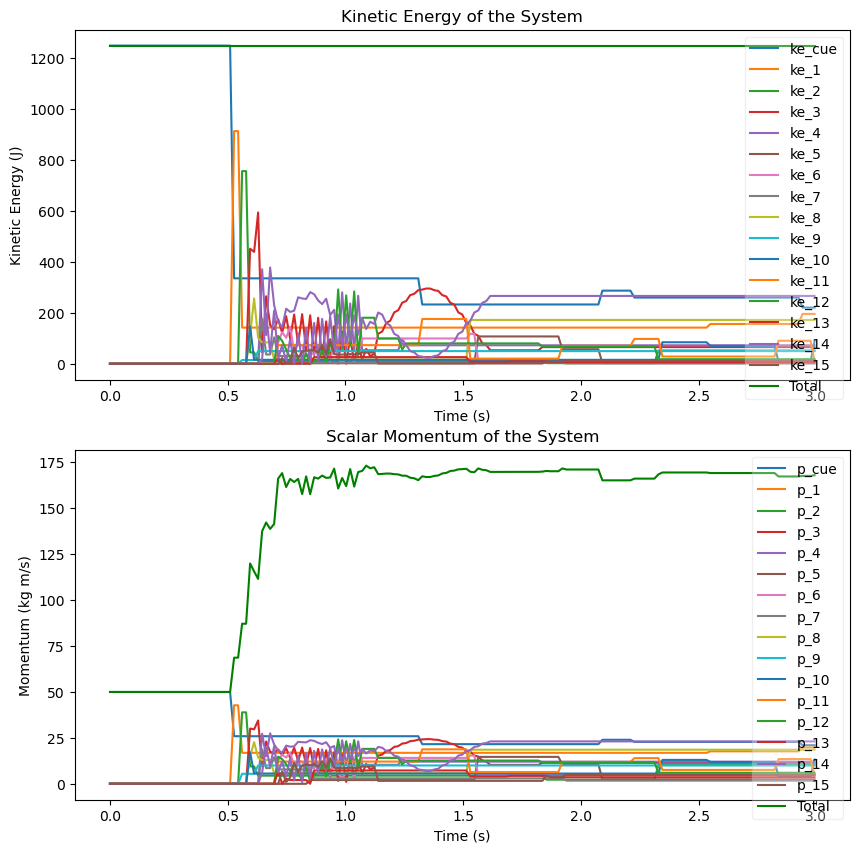

In [6]:
# Color constants used in the scene in addition to VPython color constants.
brown = vec(0.517,0.353,0.027)
dark_green = vec(0.294,0.459,0.247)
purple = vec(0.721,0.404,1)
red_brown = vector(0.608,0.255,0.016)

# Setup the scene and VPython Objects
scene = canvas()
scene.camera.pos = vector(30,20,0)
scene.autoscale = False
scene.forward = vector(-5,-4,0)
floor = box(pos=vector(0,0,0), size=vector(50,1,30), color=dark_green)

back_wall = box(pos=vector(0,0,-15), size=vector(50,10,1), color=brown)
left_wall = box(pos=vector(-25,0,0), size=vector(1,10,30), color=brown)
right_wall = box(pos=vector(25,0,0), size=vector(1,10,30), color=brown)
front_wall = box(pos=vector(0,0,15), size=vector(50,10,1), color=brown)

cue_ball = sphere(id="cue",pos=vector(20,1,0), radius=1, color=color.white, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_12 = sphere(id="12",pos=vector(-20,1,5), radius=1, color=purple, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_6 = sphere(id="6",pos=vector(-20,1,3), radius=1, color=color.green, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_15 = sphere(id="15",pos=vector(-20,1,1), radius=1, color=red_brown, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_13 = sphere(id="13",pos=vector(-20,1,-1), radius=1, color=color.orange, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_5 = sphere(id="5",pos=vector(-20,1,-3), radius=1, color=color.orange, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_4 = sphere(id="4",pos=vector(-17,1,4), radius=1, color=purple, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_14 = sphere(id="14",pos=vector(-17,1,2), radius=1, color=color.green, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_7 = sphere(id="7",pos=vector(-17,1,0), radius=1, color=red_brown, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_11 = sphere(id="11",pos=vector(-17,1,-2), radius=1, color=color.red, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_3 = sphere(id="3",pos=vector(-14,1,3), radius=1, color=color.red, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_8 = sphere(id="8",pos=vector(-14,1,1), radius=1, color=color.black, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_10 = sphere(id="10",pos=vector(-14,1,-1), radius=1, color=color.blue, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_2 = sphere(id="2",pos=vector(-11,1,2), radius=1, color=color.blue, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_9 = sphere(id="9",pos=vector(-11,1,0), radius=1, color=color.yellow, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_1 = sphere(id="1",pos=vector(-8,1,1), radius=1, color=color.yellow, 
                  velocity=vector(0,0,0), v_norm=vector(0,0,0), 
                  v_tan=vector(0,0,0), accel=vector(0,0,0), mass=1, 
                  force=vector(0,0,0),ke=0)
ball_list = [cue_ball,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,ball_7,ball_8,ball_9,ball_10,ball_11,ball_12,ball_13,ball_14,ball_15]

def check_ball_wall_collision(ball):
    if (ball.pos.x <= left_wall.pos.x+ball.radius) or (ball.pos.x >= right_wall.pos.x-ball.radius):
        ball.velocity.x = -ball.velocity.x
    
    if (ball.pos.z <= back_wall.pos.z+ball.radius) or (ball.pos.z >= front_wall.pos.z-ball.radius):
        ball.velocity.z = -ball.velocity.z

def check_ball_ball_collision(ball1,ball2):
    if mag(ball1.pos-ball2.pos) <= ball1.radius+ball2.radius:
        n_vect = ball2.pos-ball1.pos
        un_vect = norm(n_vect)
        ut_vect = vector(-un_vect.z,0,un_vect.x)
        ball1.v_norm = un_vect.dot(ball1.velocity)
        ball1.v_tan = ut_vect.dot(ball1.velocity)
        ball2.v_norm = un_vect.dot(ball2.velocity)
        ball2.v_tan = ut_vect.dot(ball2.velocity)

        temp_vnorm1 = ball1.v_norm
        
        ball1.v_norm = (((ball1.v_norm)*(ball1.mass-ball2.mass))+(2*ball2.mass*ball2.v_norm))/(ball1.mass+ball2.mass)
        ball2.v_norm = (((ball2.v_norm)*(ball2.mass-ball1.mass))+(2*ball1.mass*temp_vnorm1))/(ball1.mass+ball2.mass)
        ball1.v_norm = un_vect*ball1.v_norm
        ball2.v_norm = un_vect*ball2.v_norm
        ball1.v_tan = ut_vect*ball1.v_tan
        ball2.v_tan = ut_vect*ball2.v_tan
                       
        ball1.velocity = ball1.v_norm+ball1.v_tan
        ball2.velocity = ball2.v_norm+ball2.v_tan

# Setup real-time timestep
t = 0
dt = 0.017

ball_list[0].velocity = vector(-50,0,0)

total_ke_list = []
total_p_list = []
t_list = []
ball_ke_list = [[] * i for i in range(0,16)]
ball_p_list = [[] * i for i in range(0,16)]
        
while t < 3:
    rate(60)
    for i in range(len(ball_list)):
        check_ball_wall_collision(ball_list[i])
        for j in range(i+1,len(ball_list)):
            check_ball_ball_collision(ball_list[i],ball_list[j])
    total_ke = 0
    total_p = 0
    for i in range(len(ball_list)):
        ball_list[i].pos += ball_list[i].velocity*dt
        ball_list[i].ke = (mag(ball_list[i].velocity)**2)*0.5*ball_list[i].mass
        total_ke += ball_list[i].ke
        ball_ke_list[i].append(ball_list[i].ke)
        ball_list[i].mom = ball_list[i].mom = vec(abs(ball_list[i].velocity.x),0,abs(ball_list[i].velocity.z))*ball_list[i].mass
        ball_p_list[i].append(mag(ball_list[i].mom))
        total_p += mag(ball_list[i].mom)
    
    total_p_list.append(total_p)
    total_ke_list.append(total_ke)
    t_list.append(t)
    
    t += dt
    
# Plot results for kinetic energy and momentum
fig, axs = plt.subplots(2,figsize=(10, 10))

for i in range(len(ball_ke_list)):
    axs[0].plot(t_list,ball_ke_list[i],label=f"ke_{ball_list[i].id}")
    
axs[0].plot(t_list,total_ke_list,color="green",label="Total")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Kinetic Energy (J)")
axs[0].set_title("Kinetic Energy of the System")
axs[0].legend(fancybox=True, framealpha=0.3)

for i in range(len(ball_p_list)):
    axs[1].plot(t_list,ball_p_list[i],label=f"p_{ball_list[i].id}")
    
axs[1].plot(t_list,total_p_list,color="green",label="Total")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Momentum (kg m/s)")
axs[1].set_title("Scalar Momentum of the System")
axs[1].legend(fancybox=True, framealpha=0.3)